<a href="https://colab.research.google.com/github/Vu3jxg/Internship_Corizo/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/stock_price_prediction/stock_price.xlsx'
sheet_name = 'Stock Price dataset'

In [ ]:
stock_df = pd.read_excel(path, sheet_name, index_col= 'Date')
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [ ]:
stock_df.shape

(542, 6)

In [ ]:
stock_df.isnull().sum() # No null values present in the dataset.

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 2018-02-05 to 2020-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       542 non-null    float64
 1   High       542 non-null    float64
 2   Low        542 non-null    float64
 3   Close      542 non-null    float64
 4   Adj Close  542 non-null    float64
 5   Volume     542 non-null    float64
dtypes: float64(6)
memory usage: 29.6 KB


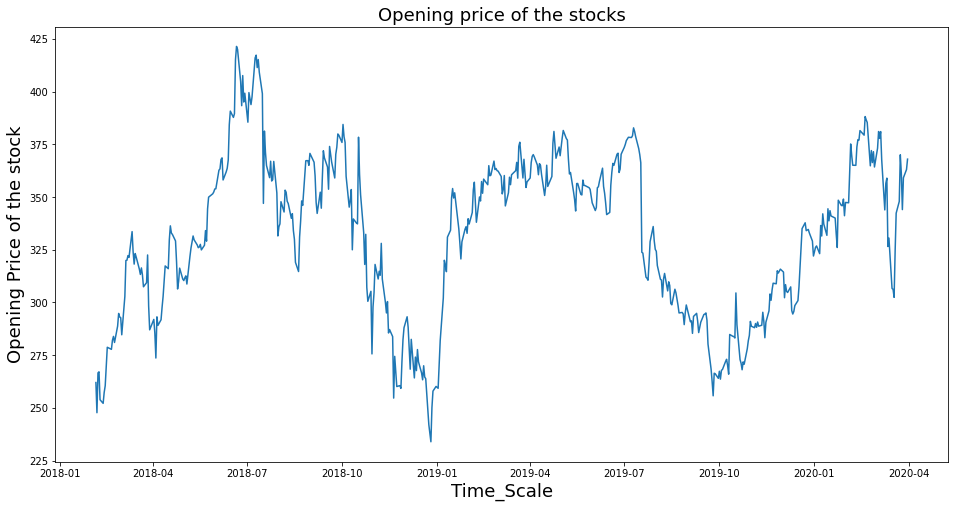

In [ ]:
# Visualise the opening price.
plt.figure(figsize=(16,8))
plt.title("Opening price of the stocks", fontsize=18)
plt.plot(stock_df["Open"])
plt.xlabel('Time_Scale', fontsize=18)
plt.ylabel('Opening Price of the stock', fontsize=18)
plt.show()

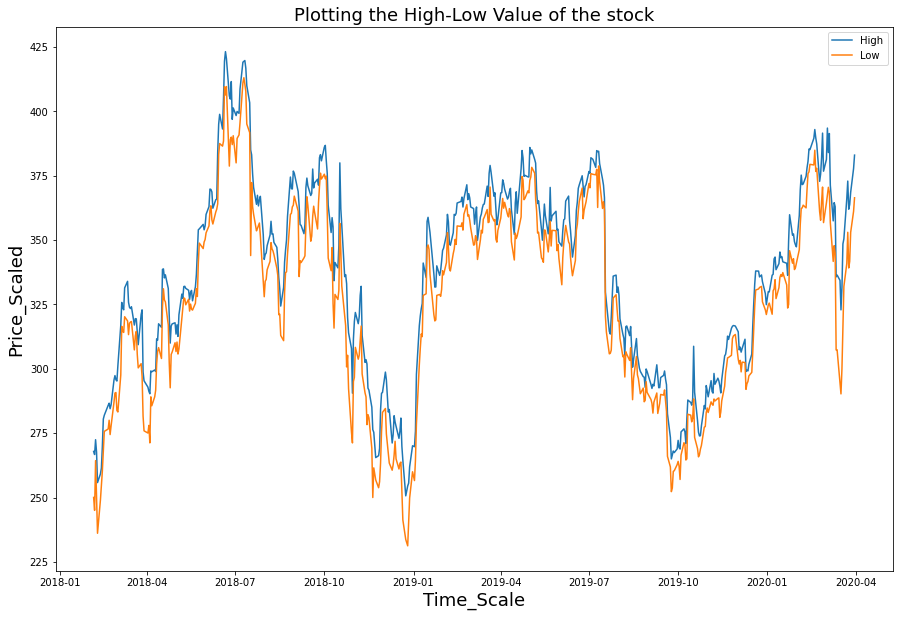

In [ ]:
# plotting the High and low value in the graph.

plt.figure(figsize=(15,10))
plt.plot(stock_df['High'], label= 'High')
plt.plot(stock_df['Low'], label= 'Low')
plt.title("Plotting the High-Low Value of the stock", fontsize=18)
plt.xlabel("Time_Scale", fontsize=18)
plt.ylabel("Price_Scaled", fontsize=18)
plt.legend()
plt.show()

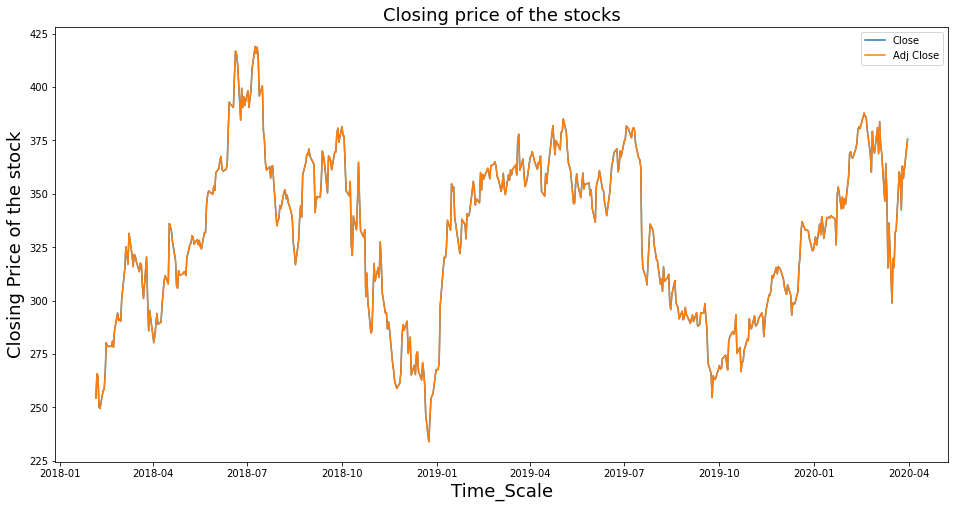

In [ ]:
# Visualise the Closing price.
plt.figure(figsize=(16,8))
plt.title("Closing price of the stocks", fontsize=18)
plt.plot(stock_df["Close"], label="Close")
plt.plot(stock_df["Adj Close"], label="Adj Close")
plt.xlabel('Time_Scale', fontsize=18)
plt.ylabel('Closing Price of the stock', fontsize=18)
plt.legend()
plt.show()

It is observed that the stock closing price is increasing over the Time Scale(Time_Scale)

In [ ]:
# Seperating the target column, i.e. stock_df['Adj Close']

train_df = stock_df.iloc[:,4:5].values 
print(train_df)

[[254.259995]
 [265.720001]
 [264.559998]
 [250.100006]
 [249.470001]
 [257.950012]
 [258.269989]
 [266.      ]
 [280.269989]
 [278.519989]
 [278.549988]
 [281.040009]
 [278.140015]
 [285.929993]
 [294.160004]
 [290.609985]
 [291.380005]
 [290.390015]
 [301.049988]
 [315.      ]
 [325.220001]
 [321.160004]
 [317.      ]
 [331.440002]
 [321.299988]
 [315.880005]
 [321.549988]
 [321.089996]
 [318.450012]
 [313.480011]
 [317.5     ]
 [316.480011]
 [306.700012]
 [300.940002]
 [320.350006]
 [300.690002]
 [285.769989]
 [295.350006]
 [280.290009]
 [283.670013]
 [288.940002]
 [293.970001]
 [288.850006]
 [289.929993]
 [298.070007]
 [303.670013]
 [309.25    ]
 [311.649994]
 [307.779999]
 [336.059998]
 [334.519989]
 [332.700012]
 [327.769989]
 [318.690002]
 [307.019989]
 [305.76001 ]
 [313.980011]
 [311.76001 ]
 [312.459991]
 [313.299988]
 [313.359985]
 [311.690002]
 [320.089996]
 [326.26001 ]
 [326.890015]
 [330.299988]
 [329.600006]
 [326.459991]
 [328.529999]
 [326.130005]
 [328.190002]
 [325.

In [ ]:
# Normalize and rescale the train_df data with the sklearn.preprocessing MinMaxScaler.

sc = MinMaxScaler(feature_range=(0,1))
train_df = sc.fit_transform(train_df)

In [ ]:
train_df.shape #Shape of the transformed dataset.

(542, 1)

In [ ]:
X_train = []
y_train = []

for i in range(60, 542): # 60: timestep // 1009 is the length of the dataset.
    X_train.append(train_df[i-60:i, 0])
    y_train.append(train_df[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)    

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(482, 60, 1)

In [ ]:
# Importing Libraries for building the LSTM model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
#dropout to prevent overfitting
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1))) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True)) # Adding a second LSTM layer and some Dropout regularisation
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True)) # Adding a third LSTM layer and some Dropout regularisation
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100)) # Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1)) # Adding the output layer
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # Compiling the RNN

In [ ]:
# Fitting the RNN to the Training set

regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
16/16 [==============================] - 11s 205ms/step - loss: 0.0616
Epoch 2/200
16/16 [==============================] - 3s 204ms/step - loss: 0.0204
Epoch 3/200
16/16 [==============================] - 4s 264ms/step - loss: 0.0176
Epoch 4/200
16/16 [==============================] - 3s 205ms/step - loss: 0.0208
Epoch 5/200
16/16 [==============================] - 3s 207ms/step - loss: 0.0191
Epoch 6/200
16/16 [==============================] - 3s 206ms/step - loss: 0.0189
Epoch 7/200
16/16 [==============================] - 3s 201ms/step - loss: 0.0288
Epoch 8/200
16/16 [==============================] - 3s 202ms/step - loss: 0.0189
Epoch 9/200
16/16 [==============================] - 3s 204ms/step - loss: 0.0130
Epoch 10/200
16/16 [==============================] - 3s 200ms/step - loss: 0.0127
Epoch 11/200
16/16 [==============================] - 3s 201ms/step - loss: 0.0158
Epoch 12/200
16/16 [==============================] - 3s 202ms/step - loss: 0.0156
Epoch 13/200

Testing the model and the prediction that it made during the testing phase

In [ ]:
sheet_name1 = 'Test_Data'
test_df = pd.read_excel(path, sheet_name1, index_col= 'Date')
test_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,376.049988,380.230011,361.019989,364.079987,364.079987,6672500.0
2020-04-02,364.079987,370.989990,360.059998,370.079987,370.079987,4592500.0
2020-04-03,367.470001,370.899994,357.510010,361.760010,361.760010,4860800.0
2020-04-06,365.220001,380.290009,361.709991,379.959991,379.959991,8183900.0
2020-04-07,380.000000,381.329987,369.339996,372.279999,372.279999,7046400.0


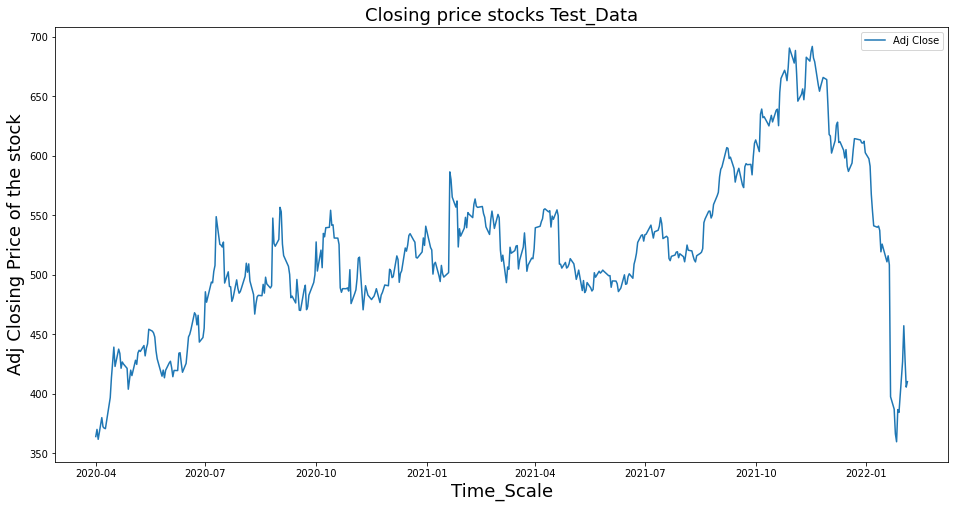

In [ ]:
# Visualise the Closing price of the test dataset.
plt.figure(figsize=(16,8))
plt.title("Closing price stocks Test_Data", fontsize=18)
# plt.plot(stock_df["Close"], label="Close")
plt.plot(test_df["Adj Close"], label="Adj Close")
plt.xlabel('Time_Scale', fontsize=18)
plt.ylabel('Adj Closing Price of the stock', fontsize=18)
plt.legend()
plt.show()

In [ ]:
real_stock_price = test_df.iloc[:, 4:5].values

In [ ]:
# Getting the predicted stock price

dataset_total = pd.concat((stock_df['Adj Close'], test_df['Adj Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_df) - 60:].values #getting input of each previous financial days
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
length = len(real_stock_price)
X_test = []
for i in range(60, length):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

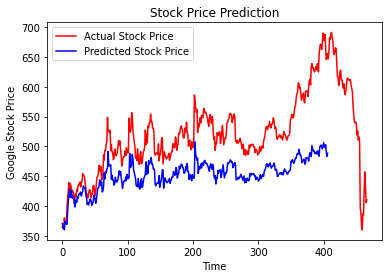

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()